In [1]:
import tensorflow as tf

2023-07-28 19:54:33.368202: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-28 19:54:33.839912: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-28 19:54:35.666014: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
print(fashion_mnist)

((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

In [3]:
(X_train_full, y_train_full) , (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[0:-5000], y_train_full[0:-5000]
X_val, y_val = X_train_full[-5000:], y_train_full[-5000:]
print("The shape of the X_train_full is: ",X_train_full.shape)
print("The shape of the X_train is:", X_train.shape)
print("The shape of the X_validation is:", X_val.shape)

The shape of the X_train_full is:  (60000, 28, 28)
The shape of the X_train is: (55000, 28, 28)
The shape of the X_validation is: (5000, 28, 28)


In [4]:
# feature scaling
X_train, X_val, X_test = X_train/255.0, X_val/255.0, X_test/255.0

In [5]:
# defining the class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
# checking the first class of test dataset
print(class_names[y_test[0]])

Ankle boot


***Creating the Model***

In [7]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

2023-07-28 19:54:38.002706: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-28 19:54:38.003834: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


***Model Summary***

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


***Initial weights and bias of the model***

In [9]:
hidden_1 = model.layers[1]
weights, bais = hidden_1.get_weights()
print(weights)

[[ 0.06008783  0.0404885  -0.06817218 ... -0.02845636  0.03936733
   0.06766729]
 [ 0.04062107  0.0688611  -0.02258772 ...  0.06857999  0.06875286
  -0.00938563]
 [ 0.05409123  0.02941713  0.04643912 ...  0.02529415 -0.06760731
  -0.04585766]
 ...
 [-0.0592908  -0.03040917 -0.0384377  ... -0.06719505 -0.00075961
  -0.02182084]
 [ 0.02889775  0.02407373 -0.02676422 ... -0.07321805  0.01538222
   0.01346454]
 [ 0.04705838  0.03057561 -0.05703861 ... -0.03653771  0.04859211
   0.00552979]]


***Compiling the model***

In [10]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

***Train and Evaluate the model***

In [11]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7300 - accuracy: 0.7625 - val_loss: 0.5024 - val_accuracy: 0.8316
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4848 - accuracy: 0.8315 - val_loss: 0.4580 - val_accuracy: 0.8342
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4382 - accuracy: 0.8455 - val_loss: 0.4202 - val_accuracy: 0.8534
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4134 - accuracy: 0.8557 - val_loss: 0.3954 - val_accuracy: 0.8588
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3925 - accuracy: 0.8619 - val_loss: 0.3907 - val_accuracy: 0.8574
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3765 - accuracy: 0.8668 - val_loss: 0.3883 - val_accuracy: 0.8618
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3640 - accuracy: 0.8701 - val_loss: 0.3719 - val_accuracy:

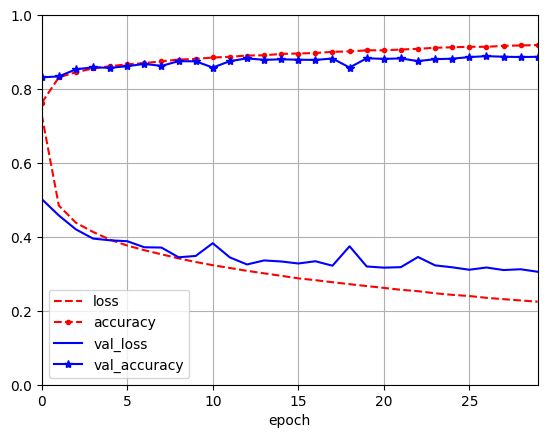

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(xlim=[0,29], ylim=[0,1], xlabel="epoch", style=["r--", "r--.", "b-", "b-*"], grid=True)
plt.show()

***Using model to make predictions***

In [17]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3266 - accuracy: 0.8834


[0.3265804350376129, 0.883400022983551]

In [21]:
X_new = X_test[:3]
y_probabilty = model.predict(X_new)
y_probabilty.round(2)
# print(y_probabilty)

1/1 [==============================] - 0s 27ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [26]:
import numpy as np
y_predicted = np.argmax(y_probabilty, axis=1)
print(y_predicted)
np.array(class_names)[y_predicted]

[9 2 1]


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')